# Lecture 10

## Esercizio 10.1

Ci proponiamo di risolvere il problema del commesso viaggiatore (TSP: Travaling Salesman Problem) mediante l'utilizzo di un Algoritmo di Simulated Annealing (SA).

Il TSP consiste nel trovare il percorso più breve tra $N$ città, visitandole tutte una sola volta e tornando infine alla città di partenza. Per fare ciò, date le coordinate delle città $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, si cerca di minimizzare il funzionale costo, che qui cosideriamo essere la lunghezza totale del percorso $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)=\sum_{i=1}^{N}|\vec{x}_i-\vec{x}_{i+1}|$, dove l'indice $N+1$ si intende uguale a $1$.
In generale, un percorso sarà dato da $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N=\vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}$ dove $P$ è una permutazione generica degli indici.
Fissiamo inoltre arbitrariamente la prima città, che resta il punto di partenza e di arrivo durante tutta la simulazione.

Alla base del SA sta l'assimilazione del nostro problema di ottimizzazione ad un sistema termodinamico: come quest'ultimo viene lentamente raffreddato per raggiungere la configurazione di minima energia, così noi interpretiamo la funzione costo $L$ come "energia" della distribuzione di probabilità di Boltzmann, andando a cercare di minimizzarla "raffreddando" lentamente il sistema. Così partendo da una $\beta=0.004$ e dunque da una temperatura $T=1/\beta=250K$ (poniamo $k_B=1$) procediamo ad aumentare $\beta$ in modo lento, secondo uno scaling del tipo $\beta_{i+1}=\beta_{i}\times c$, dove $c>1$ è un parametro che regola la crescita di $\beta$, che ho scelto uguale a $1.015$.
Per implementare il SA, adoperiamo le stesse mutazioni (non c'è invece Crossover) utilizzate nell'Algoritmo Genetico con la medesima probabilità $p_{mut}=0.07$, che intervengono ogni volta che si compie una nuova iterazione. Tali modifiche di $L$ possono essere poi accettate o rigettate: se la lunghezza corrispondente al nuovo percorso è minore rispetto a quella del percorso vecchio, allora la mossa viene sempre accettata, altrimenti viene accetata con probabilità pari al peso di Boltzmann.

Per il nostro specifico problema legato alla visita di $N=32$ città, ho scelto di considerare $10^6$ iterazioni totali, imponendo un cambio di temperatura ogni $1000$ iterazioni, valutando quindi $1000$ valori di temperatura (ossia di $\beta$) diversi. 
Considerando il valore iniziale di $\beta=0.004$ e dunque una temperatura iniziale di $T=1/\beta=250K$, prendendo $c=1.015$, si porta il sistema ad una temperatura finale di circa $T_{fin}=0.000085$.


## Città su una circonferenza

Nel primo caso, le città che il viaggiatore deve visitare sono tutte disposte (casualmente) su una circonferenza, che ho fissato avere raggio $r=1$. 
Di seguito i grafici che riportano la lunghezza del percorso migliore in funzione del numero di iterazioni; infine, il plot del percorso migliore trovato con l'Algoritmo SA.

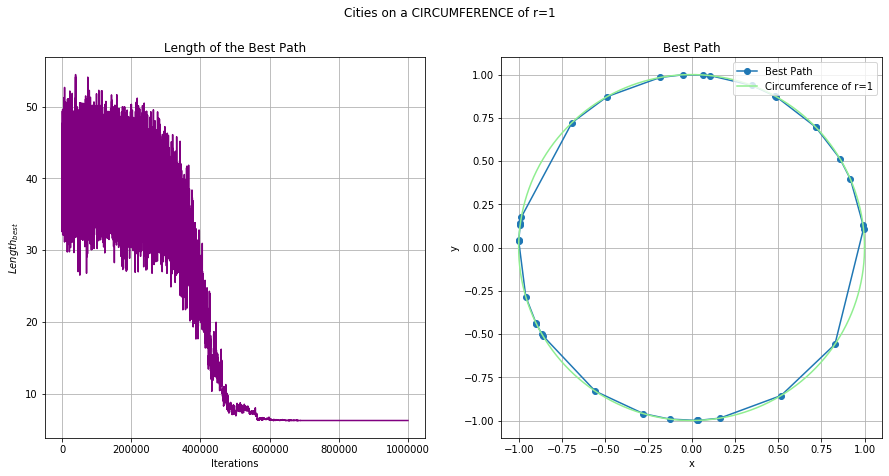

Length of the Best Path:  6.2403


In [1]:
import numpy as np
import matplotlib.pyplot as plt

c_best=np.loadtxt("ES10.1/CIRCLE_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.1/CIRCLE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities on a CIRCUMFERENCE of r=1")
c_gen=np.linspace(1,1000000,1000000)

plt.subplot(121)
plt.plot(c_gen,c_best, color='purple')
plt.title("Length of the Best Path")
plt.xlabel("Iterations")
plt.ylabel("$Length_{best}$")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='Best Path')
plt.plot(x,y,label='Circumference of r=1', color='lightgreen')
plt.legend(loc='upper right')
plt.title("Best Path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

Come vediamo, la lunghezza del percorso migliore sembra stabilizzarsi dopo circa $600000$ iterazioni. Notiamo che il Best Path ottenuto con il SA risulta speculare a quello ottenuto dal GA. Mi pare importante ricordare che non è garantito che i due algoritmi portino alla soluzione ottimale, bensì essi portano soltanto a una "buona" soluzione: il fatto che in tal caso le due migliori proposte ottenute separatamente risultino uguali ci potrebbe far pensare che si tratti proprio della soluzione ottimale.

## Città in un quadrato

Consideriamo ora le nostre città da visitare distribuite casualmente all'interno di un quadrato di lato fissato $L=2$.
Di seguito i grafici che riportano la lunghezza del percorso migliore in funzione del numero di iterazioni; infine, il plot del percorso migliore trovato con l'Algoritmo SA.

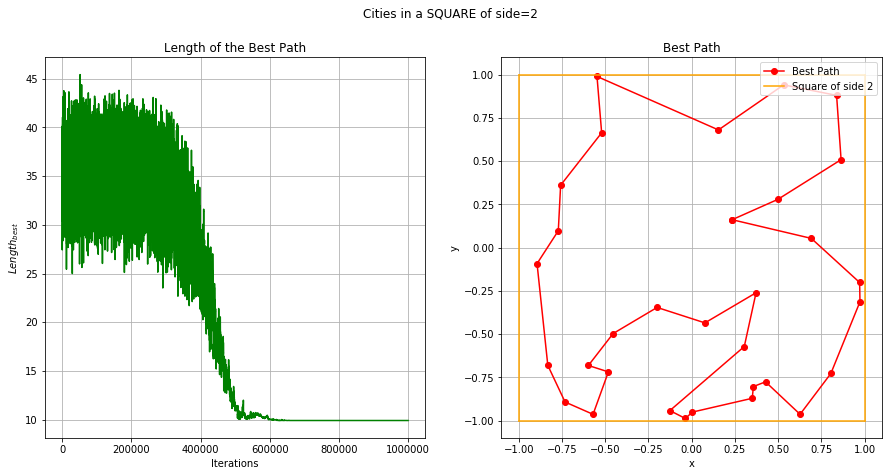

Length of the Best Path:  9.8983


In [3]:
import numpy as np
import matplotlib.pyplot as plt

c_best=np.loadtxt("ES10.1/SQUARE_fitness.dat", usecols=(0), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.1/SQUARE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities in a SQUARE of side=2")
c_gen=np.linspace(1,1000000,1000000)


plt.subplot(121)
plt.plot(c_gen,c_best,color='green')
plt.title("Length of the Best Path")
plt.xlabel("Iterations")
plt.ylabel("$Length_{best}$")
plt.grid(True)


plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='Best Path', color='red')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='Square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best Path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

Come vediamo, anche in tal caso la lunghezza del percorso migliore sembra stabilizzarsi dopo circa $600000$ iterazioni. Nuovamente il Best Path ottenuto con il SA risulta speculare a quello ottenuto dal GA, il che ancora ci potrebbe far pensare che si tratti proprio della soluzione ottimale.

## Esercizio 10.2

Procediamo ora alla risoluzione del TSP mediante un Algoritmo Genetico, questa volta sfruttando la programmazione in parallelo. Così facendo, creiamo 4 nodi che effettuano 4 ricerche GA parallele del percorso migliore (4 continenti), indipendenti ma con il vincolo di scambiare tra loro casualmente i propri individui migliori, ogni $N_{migr}$ generazioni.

Per il nostro problema specifico di $N=32$ città, ho scelto, come nell'esercizio 9, di utilizzare $1600$ generazioni da $530$ individui ciascuna, e ho fissato $N_{migr}=10$, in modo da effettuare 160 scambi. Manteniamo inoltre $p=3$, $p_{mut}=0.07$ e $p_{cross}=0.7$.

## Città su una circonferenza

Nel primo caso, le città che il viaggiatore deve visitare sono tutte disposte (casualmente) su una circonferenza, che ho fissato avere raggio $r=1$. 
Di seguito i grafici che riportano, per ognuno dei 4 continenti, la lunghezza del percorso migliore e della media dei percorsi migliori eseguita sulla migliore metà della popolazione considerata, in funzione del numero di generazioni; infine, il plot del percorso migliore trovato con l'Algoritmo Genetico.

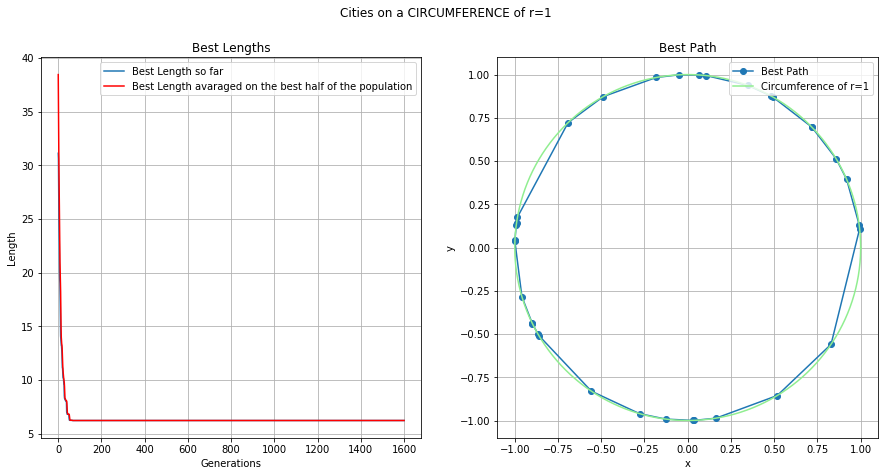

Length of the Best Path:  6.2403


In [2]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("ES10.2/0_CIRCLE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.2/0_CIRCLE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities on a CIRCUMFERENCE of r=1")
c_gen=np.linspace(1,1600,1600)

plt.subplot(121)
plt.plot(c_gen,c_best,label="Best Length so far")
plt.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='red')
plt.legend(loc='upper right')
plt.title("Best Lengths")
plt.xlabel("Generations")
plt.ylabel("Length")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='Best Path')
plt.plot(x,y,label='Circumference of r=1', color='lightgreen')
plt.legend(loc='upper right')
plt.title("Best Path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

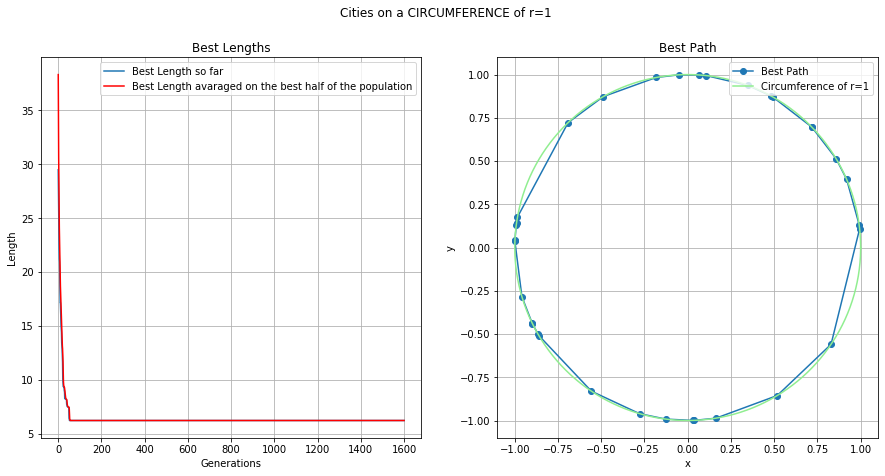

Length of the Best Path:  6.2403


In [3]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("ES10.2/1_CIRCLE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.2/1_CIRCLE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities on a CIRCUMFERENCE of r=1")
c_gen=np.linspace(1,1600,1600)

plt.subplot(121)
plt.plot(c_gen,c_best,label="Best Length so far")
plt.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='red')
plt.legend(loc='upper right')
plt.title("Best Lengths")
plt.xlabel("Generations")
plt.ylabel("Length")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='Best Path')
plt.plot(x,y,label='Circumference of r=1', color='lightgreen')
plt.legend(loc='upper right')
plt.title("Best Path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

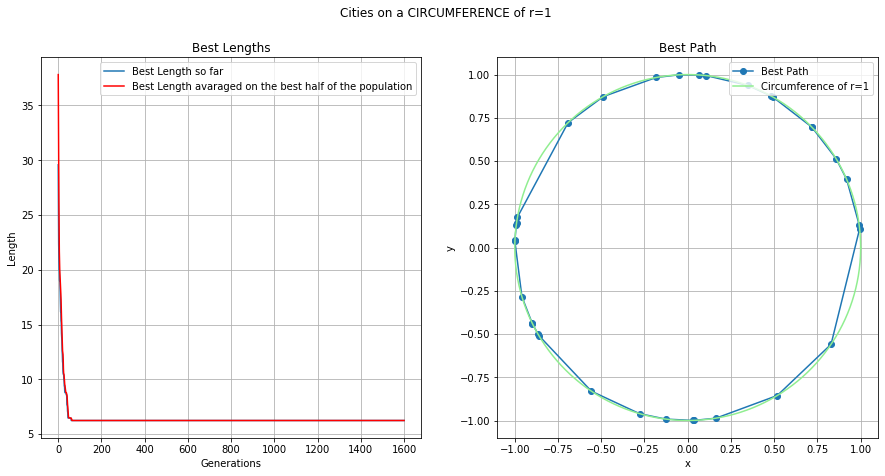

Length of the Best Path:  6.2403


In [4]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("ES10.2/2_CIRCLE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.2/2_CIRCLE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities on a CIRCUMFERENCE of r=1")
c_gen=np.linspace(1,1600,1600)

plt.subplot(121)
plt.plot(c_gen,c_best,label="Best Length so far")
plt.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='red')
plt.legend(loc='upper right')
plt.title("Best Lengths")
plt.xlabel("Generations")
plt.ylabel("Length")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='Best Path')
plt.plot(x,y,label='Circumference of r=1', color='lightgreen')
plt.legend(loc='upper right')
plt.title("Best Path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

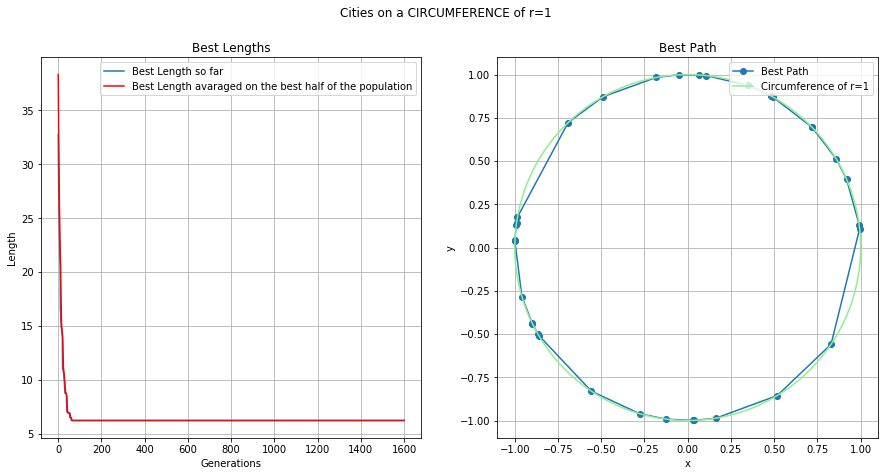

Length of the Best Path:  6.2403


In [5]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("ES10.2/3_CIRCLE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.2/3_CIRCLE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities on a CIRCUMFERENCE of r=1")
c_gen=np.linspace(1,1600,1600)

plt.subplot(121)
plt.plot(c_gen,c_best,label="Best Length so far")
plt.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='red')
plt.legend(loc='upper right')
plt.title("Best Lengths")
plt.xlabel("Generations")
plt.ylabel("Length")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x,c_y,'-o',label='Best Path')
plt.plot(x,y,label='Circumference of r=1', color='lightgreen')
plt.legend(loc='upper right')
plt.title("Best Path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

Vediamo che, dopo una serie di generazioni, grazie alle interazioni reciproche e agli scambi dei migliori percorsi tutti e 4 i nodi arrivano alla stessa conclusione e dunque ad identificare lo stesso Best Path. Inoltre, il fatto che sia il GA singolo, sia quello in parallelo, sia il SA arrivino alla medesima soluzione, ci fa pensare che essa possa effettivamente risultare la scelta ottimale.

## Città in un quadrato

Consideriamo ora le nostre città da visitare distribuite casualmente all'interno di un quadrato di lato fissato $L=2$.
Di seguito i grafici che riportano, per ognuno dei 4 continenti, la lunghezza del percorso migliore e della media dei percorsi migliori eseguita sulla migliore metà della popolazione considerata, in funzione del numero di generazioni; infine, il plot del percorso migliore trovato con l'Algoritmo Genetico.

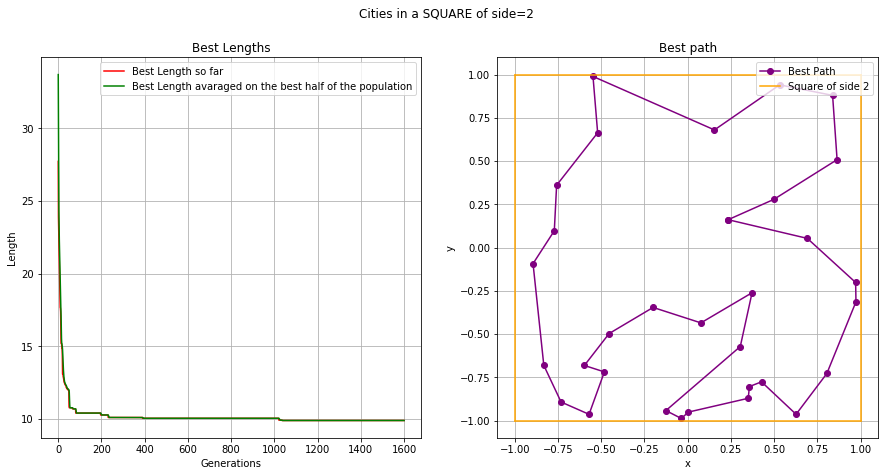

Length of the Best Path:  9.8983


In [6]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("ES10.2/0_SQUARE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.2/0_SQUARE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities in a SQUARE of side=2")
c_gen=np.linspace(1,1600,1600)


plt.subplot(121)
plt.plot(c_gen,c_best,label="Best Length so far", color='red')
plt.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='green')
plt.legend(loc='upper right')
plt.title("Best Lengths")
plt.xlabel("Generations")
plt.ylabel("Length")
plt.grid(True)

plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='Best Path', color='purple')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='Square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

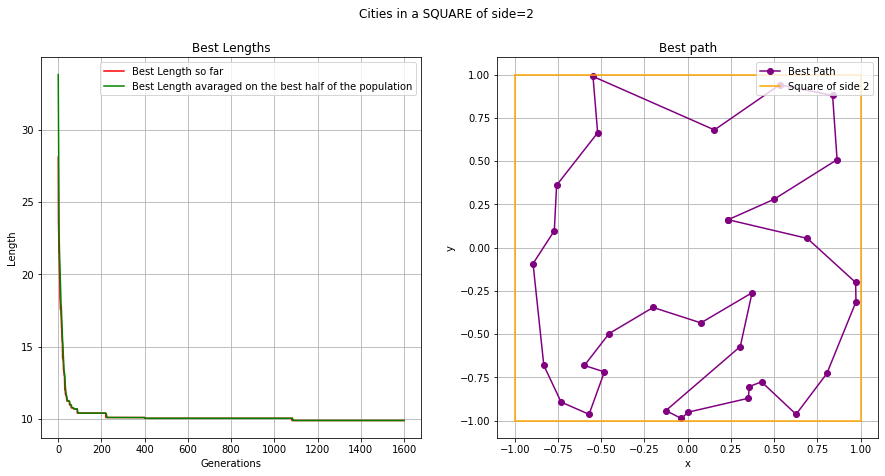

Length of the Best Path:  9.8983


In [7]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("ES10.2/1_SQUARE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.2/1_SQUARE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities in a SQUARE of side=2")
c_gen=np.linspace(1,1600,1600)


plt.subplot(121)
plt.plot(c_gen,c_best,label="Best Length so far", color='red')
plt.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='green')
plt.legend(loc='upper right')
plt.title("Best Lengths")
plt.xlabel("Generations")
plt.ylabel("Length")
plt.grid(True)


plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='Best Path', color='purple')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='Square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

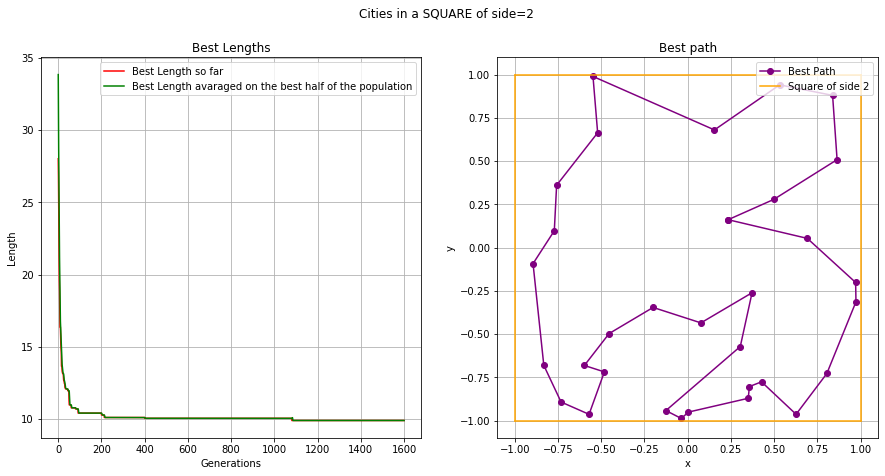

Length of the Best Path:  9.8983


In [8]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("ES10.2/2_SQUARE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.2/2_SQUARE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities in a SQUARE of side=2")
c_gen=np.linspace(1,1600,1600)


plt.subplot(121)
plt.plot(c_gen,c_best,label="Best Length so far", color='red')
plt.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='green')
plt.legend(loc='upper right')
plt.title("Best Lengths")
plt.xlabel("Generations")
plt.ylabel("Length")
plt.grid(True)


plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='Best Path', color='purple')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='Square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

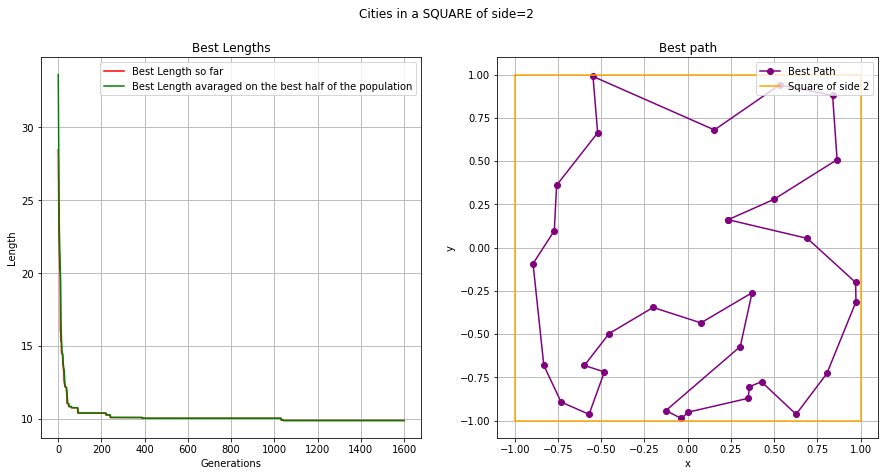

Length of the Best Path:  9.8983


In [9]:
import numpy as np
import matplotlib.pyplot as plt

c_best,c_ave=np.loadtxt("ES10.2/3_SQUARE_fitness.dat", usecols=(0,1), delimiter="   ", unpack='true')
c_x,c_y=np.loadtxt("ES10.2/3_SQUARE_bestpath.dat", usecols=(0,1), delimiter="   ", unpack='true')
plt.figure(0,figsize=(15,7))
plt.suptitle("Cities in a SQUARE of side=2")
c_gen=np.linspace(1,1600,1600)


plt.subplot(121)
plt.plot(c_gen,c_best,label="Best Length so far", color='red')
plt.plot(c_gen,c_ave,label="Best Length avaraged on the best half of the population", color='green')
plt.legend(loc='upper right')
plt.title("Best Lengths")
plt.xlabel("Generations")
plt.ylabel("Length")
plt.grid(True)


plt.subplot(122)
plt.plot(c_x,c_y,'-o',label='Best Path', color='purple')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='orange',label='Square of side 2')
plt.plot(x,x_right,color='orange')
plt.plot(x_right,x,color='orange')
plt.plot(x_left,x,color='orange')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()
print("Length of the Best Path: ", c_best[-1])

Vediamo che, dopo una serie di generazioni, grazie alle interazioni reciproche e agli scambi dei migliori percorsi tutti e 4 i nodi arrivano alla stessa conclusione e dunque ad identificare lo stesso Best Path. Inoltre, il fatto che sia il GA singolo, sia quello in parallelo, sia il SA arrivino alla medesima soluzione, ci fa pensare che essa possa effettivamente risultare nella scelta ottimale.

A livello del nostro specifico problema, i risultati della programmazione in parallelo sono speculari a quelli del GA non parallelo; ne si potrebbero più facilmente apprezzare i vantaggi con problemi più complessi. Mi pare opportuno far notare, d'altro canto, che una sola simulazione con il GA semplice richiede un tempo circa pari a $t=10 s$, mentre il calcolo in parallelo con 4 nodi impiega in totale circa $t=23 s$, quadruplicando però le ricerche. Di qui si deducono le enormi potenzialità della programmazione in parallelo.